## Homework 2 - Isabel Shic
Please explain clearly and include your entire computational work when needed. Should you include any code, please make sure to provide additional comments to explain your solution. 

### Q1 (8 points) Answer the following questions clearly. 
- (4 points) Compare the cost functions in Ridge and Lasso Regression and indicate the regularization parameter. 

- (4 points) Explain which weights are more penalized in Ridge Regression and why (discuss your answer in the context of constraint satisfaction and take into account the constraint on Ridge Regression coefficients). 

---

Ridge Regression Cost Function:
- Adds sum of squared magnitudes of coefficients multiplied by penalty term λ
- Cost Function = Loss Function + λ * Σ(w_i²)
- λ (lambda) is the regularization parameter

Lasso Regression Cost Function:
- Adds sum of absolute magnitudes of coefficients multiplied by penalty term λ
- Cost Function = Loss Function + λ * Σ|w_i|
- c is the maximum allowable value for the L1 norm of coefficients
- λ (lambda) is the regularization parameter

Larger weights are penalized in Ridge Regression more heavily than smaller weights because the penalty term uses squared magnitudes (w²), meaning small weights (such as 0.1) become even smaller when squared (0.01), and large weights (such as 2) become much larger when squared (4).

### Q2 (12 points) In the context of training a linear regression model using Maximum-Likelihood-Estimation, answer the following questions:
- (4 points) Indicate all assumptions discussed in the lecture under the MLE principle about the data, residual error, and the type of the probability density function used in the Likelihood function. 
- (4 points) Indicate the Likelihood function mathematically with respect to the assumptions made under MLE principle, and describe each term/parameters used in the likelihood function. 
- (4 points) Explain how the concept of maximizing the likelihood of observing data under model parameters is convertible to minimizing the NLL? Discuss in terms of the mathematical notation and the shape of the function. 
---

MLE assumptions:
- Model: y = g(x) + ε where x₀ = 1
- Error (ε): follows N(0, σ²), constant variance, independent across observations
- y is independent across observations
- Uses normal distribution PDF: (1/√(2πσ²))exp(-(y - wx)²/2σ²)

Likelihood function:
L(w₀,...,wₘ, σ²|x,y) = ∏ᵢ₌₁ⁿ (1/√(2πσ²))exp(-(yᵢ - wxᵢ)²/2σ²)
where: w₀,...,wₘ are regression coefficients, σ² is the error variance, x, y are the observed data points, and n is the number of observations. The product ∏ is used because observations are independent, and each term has the probability of observing data given parameters

Maximizing likelihood to minimizing NLL:
We take log of likelihood, which converts products to sums, and negate it to get NLL: -log(L(θ|X)). Because the log function is monotonically increasing, maximizing L is equivalent to maximizing log(L). Negating makes it a minimization problem - this is computationally easier because products become sums (through log), exponentials become simpler expressions, and working with sums is numerically more stable than products. Also, when the gradient of NLL is 0, we find the parameters that maximize the likelihood.


### Q3 (10 points) Use the sklearn Breast_cancer dataset and use min-max scalar to transform the input attributes. 
Next, develop two classifiers using logistic regression, and perceptron learning. Train on the training data (75% of the entire data) and compare the performance of the models by reporting accuracy "accuracy = accuracy_score(y_test, y_pred). Which model performs better? Support your answer by providing plots of the decision boundary (hint: is the decision boundary indicative of linearly separable data?). Provide your coding for the developed models and document your code. Failing proper documentation leads to losing points. Necessary library functions are provided.

---

Logistic Regression Accuracy: 0.9860
Perceptron Accuracy: 0.9441


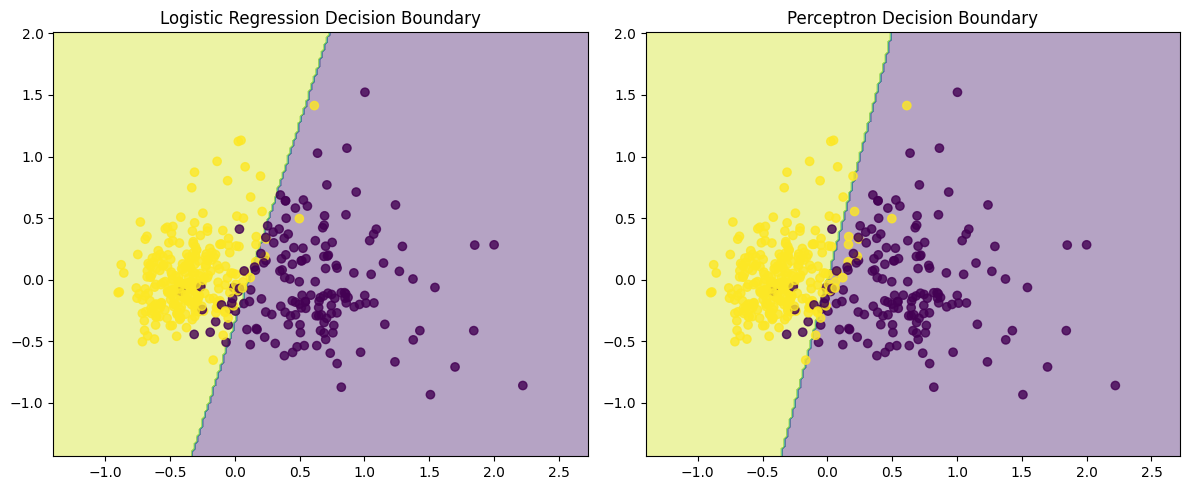

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.metrics import accuracy_score

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# load breast cancer dataset
def load_and_preprocess_data():

    data = load_breast_cancer()
    X, y = data.data, data.target
    feature_names = data.feature_names
    
    # scale features using MinMaxScaler
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    
    # split data into training + testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.25, random_state=42
    )
    
    return X_train, X_test, y_train, y_test, feature_names

def train_and_evaluate_models(X_train, X_test, y_train, y_test):

    # initialize models
    log_reg = LogisticRegression(random_state=42)
    perceptron = Perceptron(random_state=42)
    
    # train models
    log_reg.fit(X_train, y_train)
    perceptron.fit(X_train, y_train)
    
    # make predictions
    log_reg_pred = log_reg.predict(X_test)
    perceptron_pred = perceptron.predict(X_test)
    
    # calculate accuracies
    log_reg_acc = accuracy_score(y_test, log_reg_pred)
    perceptron_acc = accuracy_score(y_test, perceptron_pred)
    
    return log_reg, perceptron, log_reg_acc, perceptron_acc

def plot_decision_boundaries(X_train, X_test, y_train, y_test, log_reg, perceptron):

    # using PCA to reduce dimensions to 2 for visualization
    pca = PCA(n_components=2)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    # training models on PCA-transformed data
    log_reg_pca = LogisticRegression(random_state=42)
    perceptron_pca = Perceptron(random_state=42)
    log_reg_pca.fit(X_train_pca, y_train)
    perceptron_pca.fit(X_train_pca, y_train)
    
    # create meshgrid for decision boundary
    x_min, x_max = X_train_pca[:, 0].min() - 0.5, X_train_pca[:, 0].max() + 0.5
    y_min, y_max = X_train_pca[:, 1].min() - 0.5, X_train_pca[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                        np.arange(y_min, y_max, 0.02))
    
    # plot decision boundaries
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # LOGISTIC REGRESSION
    Z = log_reg_pca.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax1.contourf(xx, yy, Z, alpha=0.4)
    ax1.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, alpha=0.8)
    ax1.set_title('Logistic Regression Decision Boundary')
    
    # PERCEPTRON
    Z = perceptron_pca.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax2.contourf(xx, yy, Z, alpha=0.4)
    ax2.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, alpha=0.8)
    ax2.set_title('Perceptron Decision Boundary')
    
    plt.tight_layout()
    return plt

def main():
    # load and preprocess data
    X_train, X_test, y_train, y_test, feature_names = load_and_preprocess_data()
    
    # train + evaluate models
    log_reg, perceptron, log_reg_acc, perceptron_acc = train_and_evaluate_models(
        X_train, X_test, y_train, y_test
    )
    
    print(f"Logistic Regression Accuracy: {log_reg_acc:.4f}")
    print(f"Perceptron Accuracy: {perceptron_acc:.4f}")
    
    plt = plot_decision_boundaries(X_train, X_test, y_train, y_test, log_reg, perceptron)
    plt.show()

if __name__ == "__main__":
    main()

Logistic Regression performs better than Perceptron for a few reasons - Logistic Regression can handle non-linearly separable data better as it handles overlapping class distributions with its probabilistic approach, and the breast cancer dataset is not perfectly linearly separable. Meanwhile, the Perceptron algorithm struggles with non-linearly separable data because it tries to find a strict linear boundary between classes.

### Q4 (6 points) Compare and contrast Newton's method and gradient descent as optimization algorithms for finding the minimum of a function. 
Provide insights into their convergence properties, computational complexities, and practical considerations. Discuss situations where Newton's method should not be used. 

---

Approach:
- Gradient Descent: uses only first derivative and learning rate, update rule is w = w - α∇l(w)
- Newton's Method: uses both first derivative (gradient) and second derivative (Hessian matrix), update rule is w = w - α(H⁻¹∇l(w)) where H is Hessian matrix

Convergence properties:
- Gradient Descent: slower convergence, very sensitive to learning rate choice, may take many epochs to converge, but can handle non-convex functions (overall is simpler to implement and computationally cheaper)
- Newton's Method: faster convergence (especially for convex problems), less sensitive to parameter choices, but typically needs fewer iterations, and is best suited for convex optimization problems (overall requires more memory and computation per iteration, but good for smaller optimization problems)

Newton's Method should be avoided when the dataset is large with many features (aka computationally expensive), when there are numerical issues with Hessian matrix, when computing and storing Hessian matrix is impractical, and when the problem is non-convex (may converge to saddle points).

### Q5 (6 points) Mathematically explain how a perceptron learning model is trained. Discuss in terms of the gradient of the error function used in Perceptron Learning algorithm. 

---

The perceptron learning algorithm trains iteratively by updating weights based on classification errors. Specifically - 

- Error function: it uses an error function E(w) = (1/n)∑ᵢ₌₁ⁿ (yᵢ - ŷᵢ)², where yᵢ represents the actual output and ŷᵢ is the predicted output obtained through a binary step activation function. 

- Prediction: for each data point, it makes a prediction using ŷᵢ = Step(wᵀxᵢ), where the step function outputs 1 if wᵀx ≥ 0 and -1 if wᵀx < 0. 

- Weight updates: when a misclassification occurs, the weights are updated using the gradient of the error function, calculated as ∆wⱼ = (yᵢ - ŷᵢ)(-xⱼ). The weight update rule wⱼ = wⱼ - α∆wⱼ is then applied, where α is the learning rate. 

This continues until the model converges/meets a stopping criterion. It is an error-driven learning process (weight updates only occur when the model makes classification errors).

### Q6 (4 points) Compare a Perceptron Learning algorithm with "Binary Step function" used as activation function, with a linear regression function in the context of binary classification. 

---

The main difference between Perceptron Learning with Binary Step and Linear Regression for binary classificiation is that while both of them are used to create linear models, Perceptron explicitly targets classification through the binary step function, but Linear Regression's continuous output makes it less suitable for classification tasks - it cannot be used directly to predict labels because it has an unbounded output range (from lecture slides). More specifically -

Perceptron Learning with Binary Step:
- Output is strictly binary (0 or 1, or -1 and 1)
- Creates a strict linear decision boundary (but only works for linearly separable data)
- Updates weights only when misclassification occurs
- Direct classification without probability scores

Linear Regression for binary classification:
- Output is continuous, unbounded values
- Requires threshold selection to convert to binary predictions (consequently is more sensitive to threshold choice)
- Can provide prediction values outside [0,1] range
- Not ideal for classification because of its unbounded output range

### Q7 (10 points) Answer the following questions: 
- (6 points) Discuss the vanishing gradient problem in the context of training deep neural networks and identify activation functions that are particularly susceptible to this phenomenon. 
  
- (4 points) Explain why these activation functions lead to vanishing gradients during backpropagation (hint: discuss in terms of the shape of the activation function). 

---

The vanishing gradient problem occurs during backpropagation when gradients become extremely small propagating backward through layers, leading to very small weight updates in earlier layers. This makes deep networks difficult to train effectively, as earlier layers learn very slowly or stop learning entirely.
- Sigmoid (1/(1 + e⁻ˣ)) and Tanh are particularly susceptible because they have bounded output ranges (0 to 1 for sigmoid, -1 to 1 for tanh), their derivatives approach zero at both extremes, so when these small derivatives multiply together during backpropagation across multiple layers, the gradient vanishes.


### Q8 (10 points) List all hyperparameters discussed in the class related to Artificial and Deep Neural Networks and explain the role/impact of each hyperparameter. 
Which technique(s) can be used to perform hyperparameter tuning? Explain how the technique(s) work.  

---

Hyperparameters:
- Network architecture: number of hidden layers (the more layers, the deeper the network), number of neurons per layer (impacts model complexity), layer type (dense/fully connected)
- Training parameters: learning rate (α) (controls size of weight updates), number of epochs (how many times entire dataset is processed), batch size (number of samples processed before weight update), termination criteria (when to stop training)
- Model-specific: choice of activation functions (Sigmoid, ReLU, Softplus, etc), type of weight initialization, regularization parameters (if used to prevent overfitting)

Tuning techniques:
- Cross-validation: where use validation is set to monitor performance, current weights are compared to best weights so far, and stopped when current weights show significantly greater error
- Early stopping: performance is monitored on validation set, stopping when performance starts degrading, which helps prevent overfitting
- Trial and error: used especially for number of neurons in hidden layers, where increase if accuracy is low and decrease if overfitting occurs

### Q9 (20 points) Given a dataset with input attributes x1 and x2, and output variable y, you are training a 3 layer neural network. Assume that activation function used in each layer is sigmoid. 
Mathematically describe one feed-forward pass followed by one backward-pass in terms of updating the weights of each layer in this neural network. 

---

Feed-Forward Pass: First, we define structure - input layer (x₁, x₂), hidden layer (neurons with sigmoid activation), output layer (single neuron with sigmoid activation), w^(h) (weights for hidden layer), and w^(o) (weights for output layer). Next, we perform feed-forward calculations:

Hidden layer:
- z_j^(h) = ∑ᵢ wᵢⱼ^(h)xᵢ + b_j^(h)
- a_j^(h) = sigmoid(z_j^(h)) = 1/(1 + e^(-z_j^(h)))

Output layer:
- z^(o) = ∑ⱼ wⱼ^(o)a_j^(h) + b^(o)
- ŷ = sigmoid(z^(o)) = 1/(1 + e^(-z^(o)))

Backward pass:
- Output layer error:
δ^(o) = (ŷ - y) × ŷ(1 - ŷ), 
∂E/∂w_j^(o) = δ^(o) × a_j^(h), 
update: w_j^(o) = w_j^(o) - α × ∂E/∂w_j^(o)
- Hidden layer error:
δ_j^(h) = (w_j^(o) × δ^(o)) × a_j^(h)(1 - a_j^(h)), 
∂E/∂w_ij^(h) = δ_j^(h) × xᵢ, 
update: w_ij^(h) = w_ij^(h) - α × ∂E/∂w_ij^(h)

Where α is learning rate, E is error function, and sigmoid'(x) = sigmoid(x)(1 - sigmoid(x))

Q10 (14 points) In this exercise, use the output information generated by this code to perform a comparative study of the performance (i.e., loss , Accuracy) of the neural networks models based on the hyperparameters used. Generate a table to report your analysis.
Note: If you want to run this code and have trouble with imported libraries, try 'pip install keras==2.12.0'